# Decay times

Here we start off in the SPT and then apply the channel $\mathcal F$ for various values of $\lambda$ and for open boundary conditions. $\lambda$ mixes us between our original $\mathcal E$ channel and its CZ conjugated version. 
The difference between $\mathcal F$ and $\mathcal E$ is that $\mathcal F$ is a random architecture. That is, at each time step, we randomly choose a qubit, and then apply $\mathcal E_j$ on it.
We expect to see that the mixing time scales like the number of qubits squared (i.e. random walk).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [13, 8]

We ran all the simulations and stored the data with the `data_io.py` file. In this notebook, we load in this data and then plot various things with it.

In [2]:
lams = [0.0, 0.05, 0.1, 0.5, 0.8, 1.0]
nqubits = 100

n = int(0.25 * (nqubits // 2) - 1)
ms = list(range(n + 1, n + 27))
ms.append(int(0.75 * (nqubits // 2) - 1))

with open(f"data/nqubits_{nqubits}.dat") as f:
    start = 0
    for l in f:
        if "#" in l:
            start = 1
        elif "&" in l:
            start = 2
        elif "*" in l:
            start = 3
        elif l and start == 1:
            string = np.array(eval(l.strip()))
        elif l and start == 2:
            trivial_string = np.array(eval(l.strip()))
        elif l and start == 3:
            zz = np.array(eval(l.strip()))

Plot the data for each different $\lambda$.

In [3]:
def plot(quantity, m=10):
    j = ms.index(m - n)
    plt.figure()
    if quantity == "string":
        dat = string
    elif quantity == "trivial string":
        dat = trivial_string
    elif quantity == "zz":
        dat = zz

    for i, lam in enumerate(lams):
        # for i, lam in enumerate([0, 0.05, 0.1]):
        plt.plot(
            range(len(dat[i, j])),
            dat[i, j],
            "-",
            label=f"lam = {lam}",
        )
        # plt.axvline(nqubits**2, linestyle=":", color="k")
        plt.legend(bbox_to_anchor=(1, 1))
        plt.xlabel("depth")
        plt.ylabel(quantity)
        plt.title(f"|m-n| = {2*(m-n)}")

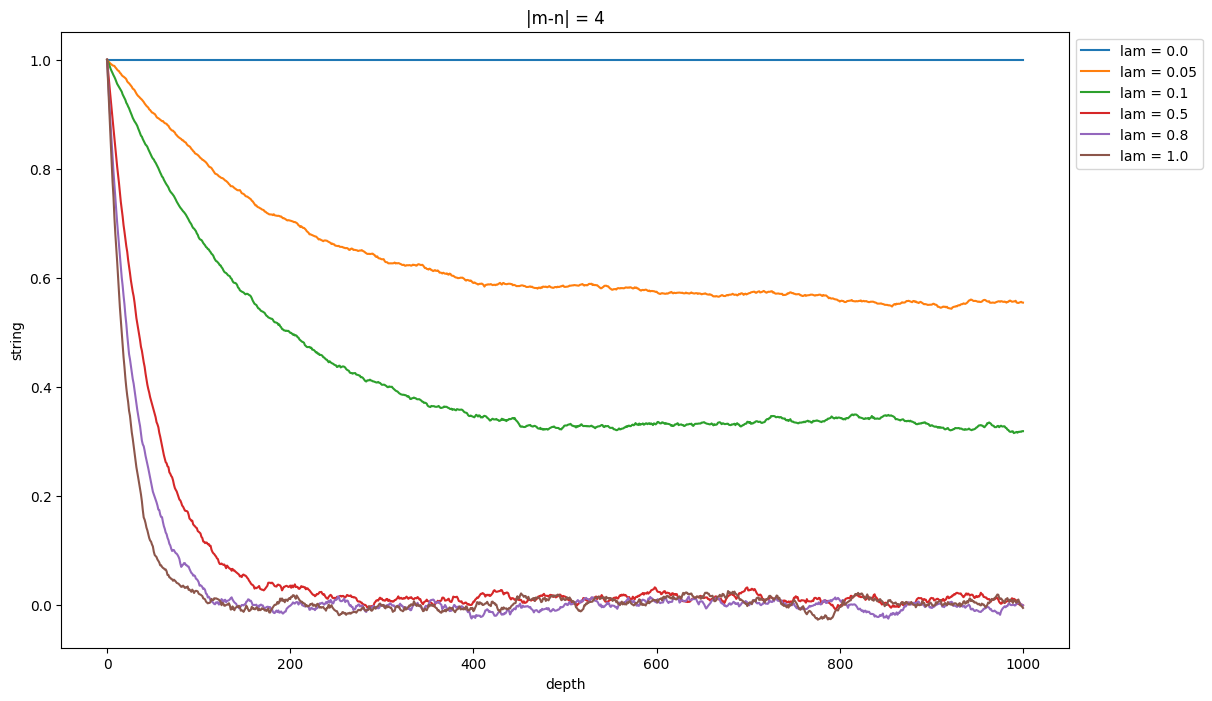

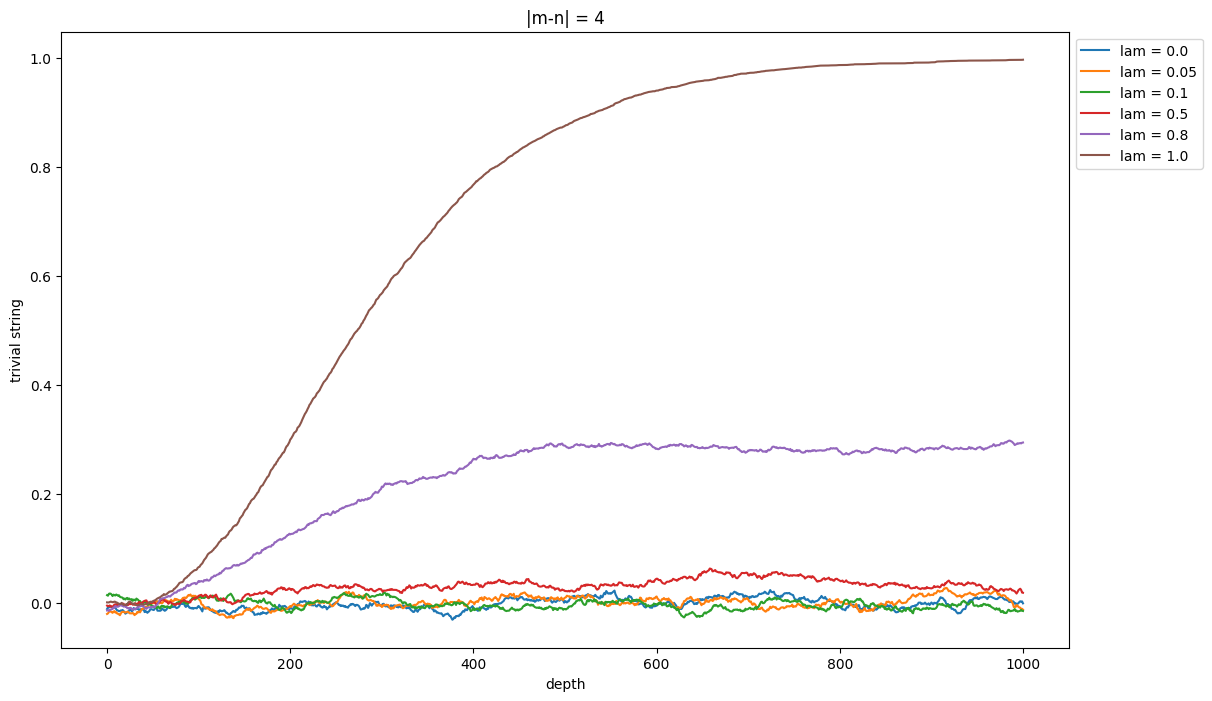

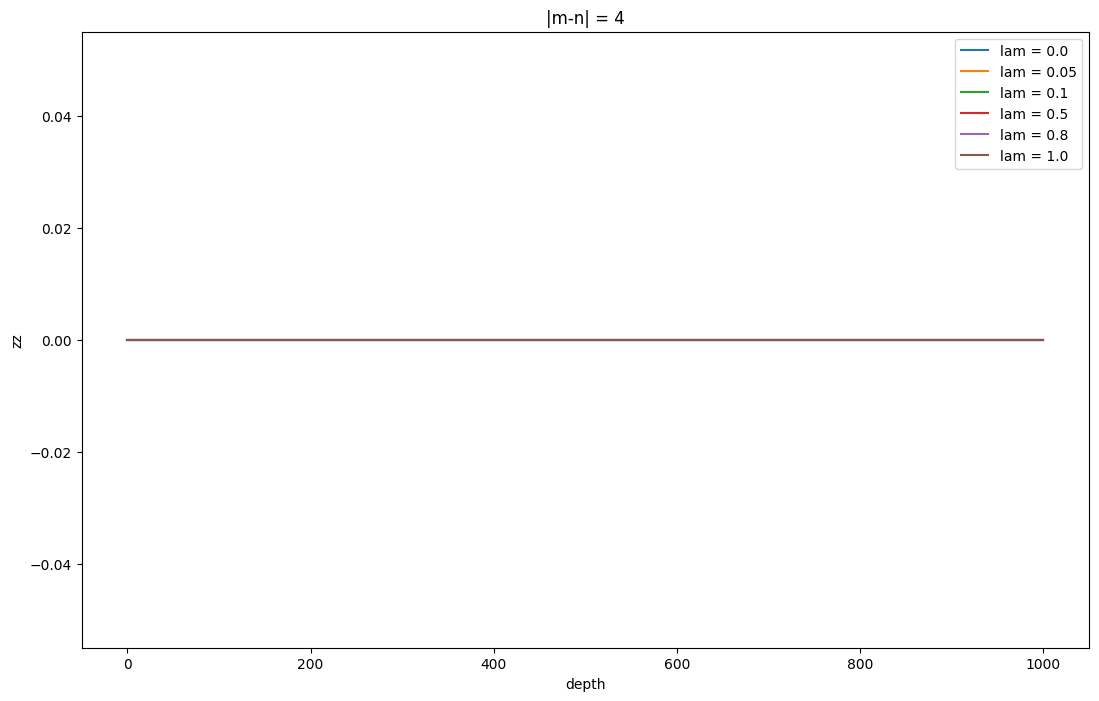

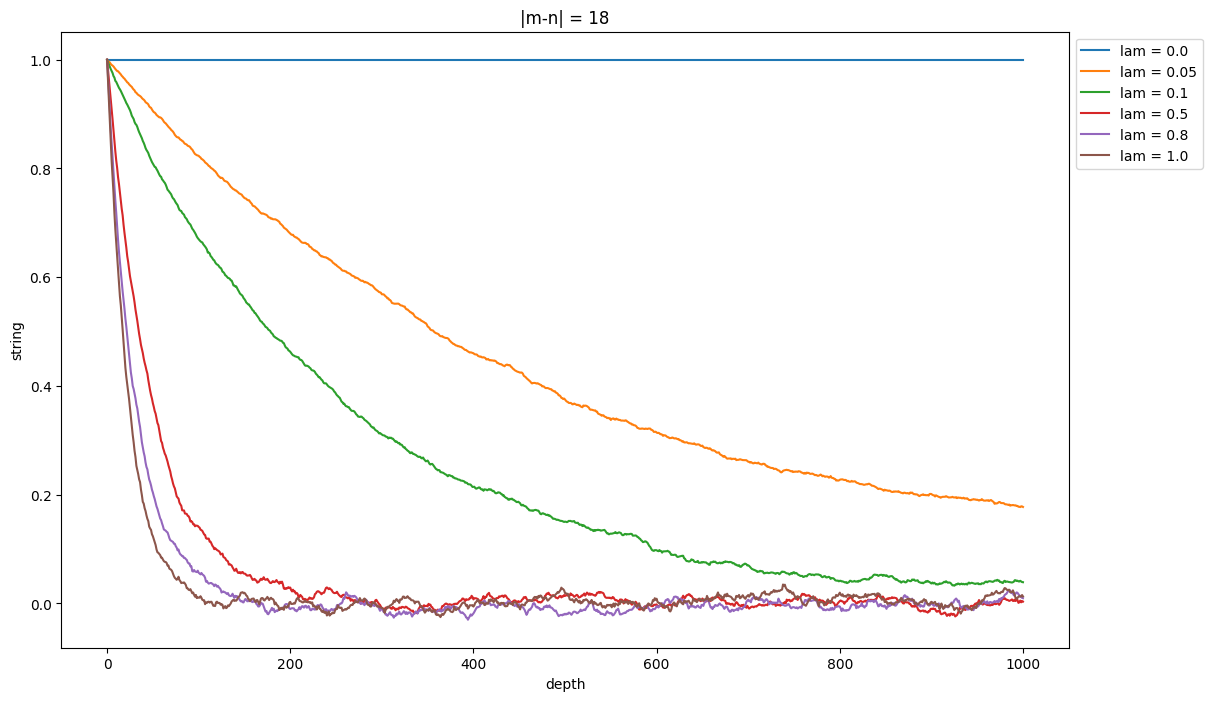

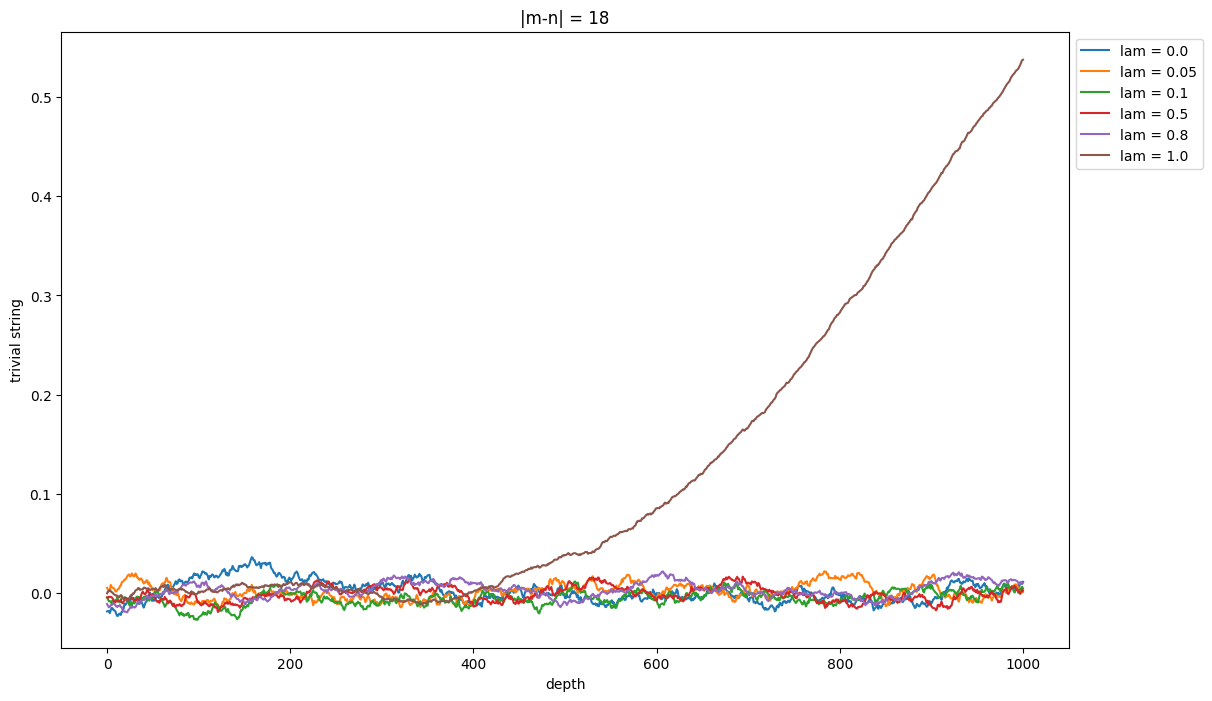

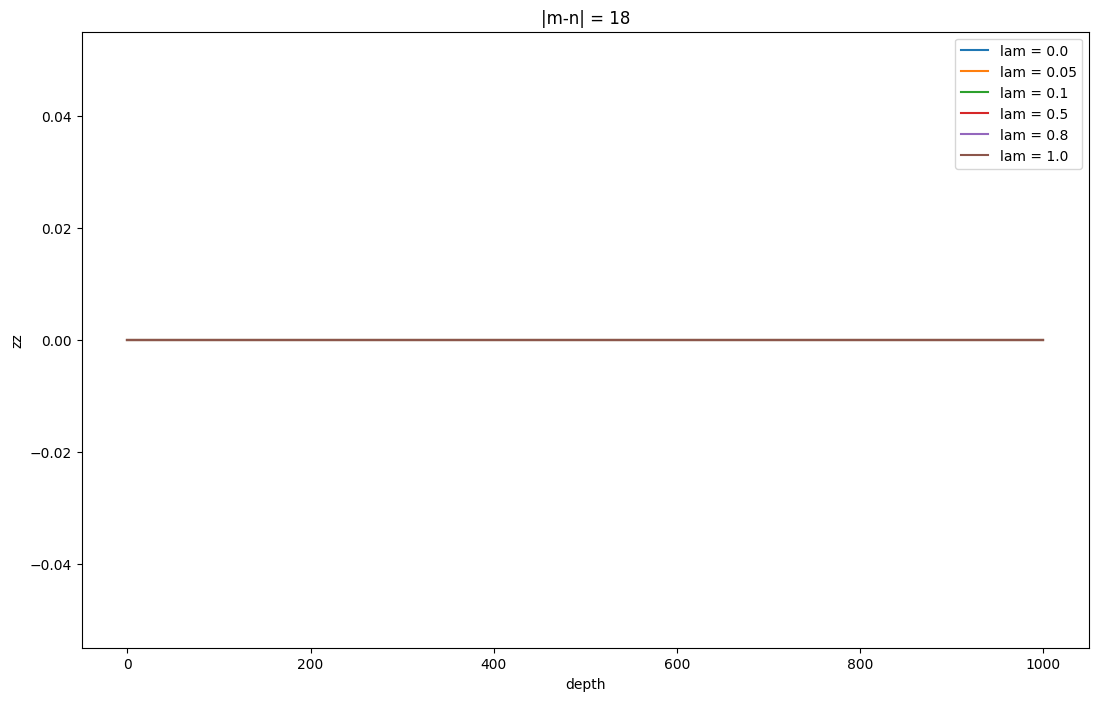

In [4]:
plot("string", 3)
plot("trivial string", 3)
plot("zz", 3)
plot("string", 10)
plot("trivial string", 10)
plot("zz", 10)
plt.show()

## Decay with $\lambda$

Plot the long time average of the string order parameter as a function of $\lambda$.

In [5]:
def plot_lt(quantity):
    plt.figure()
    if quantity == "string":
        dat = string
    elif quantity == "trivial string":
        dat = trivial_string
    elif quantity == "zz":
        dat = zz

    for i, lam in enumerate(lams):
        plt.semilogy(
            [2 * (m - n) for m in ms],
            # sum(dat[i, :, t] for t in range(-1, -501, -1)) / 500,
            sum(dat[i, :, t] for t in range(-1, -5, -1)) / 4,
            "-",
            label=f"lam = {lam}",
        )
        # plt.axvline(nqubits**2, linestyle=":", color="k")
        plt.legend(bbox_to_anchor=(1, 1))
        plt.xlabel("|m-n|")
        plt.ylabel(quantity)
        plt.title(quantity)

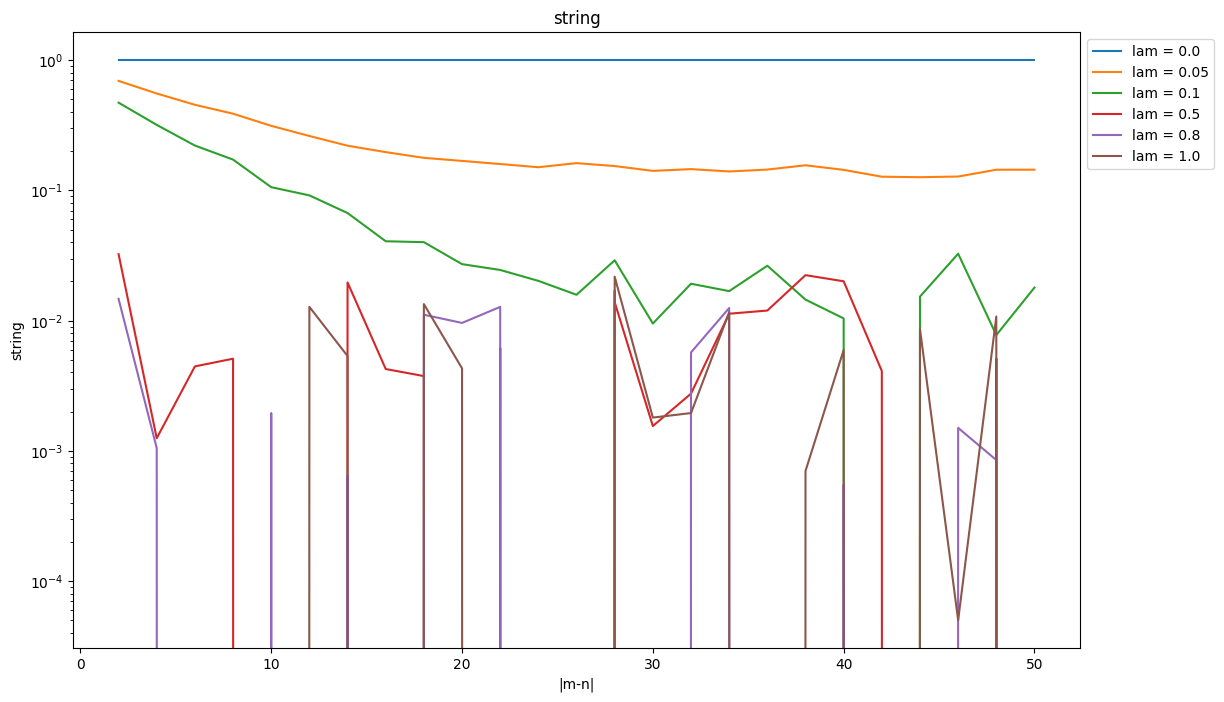

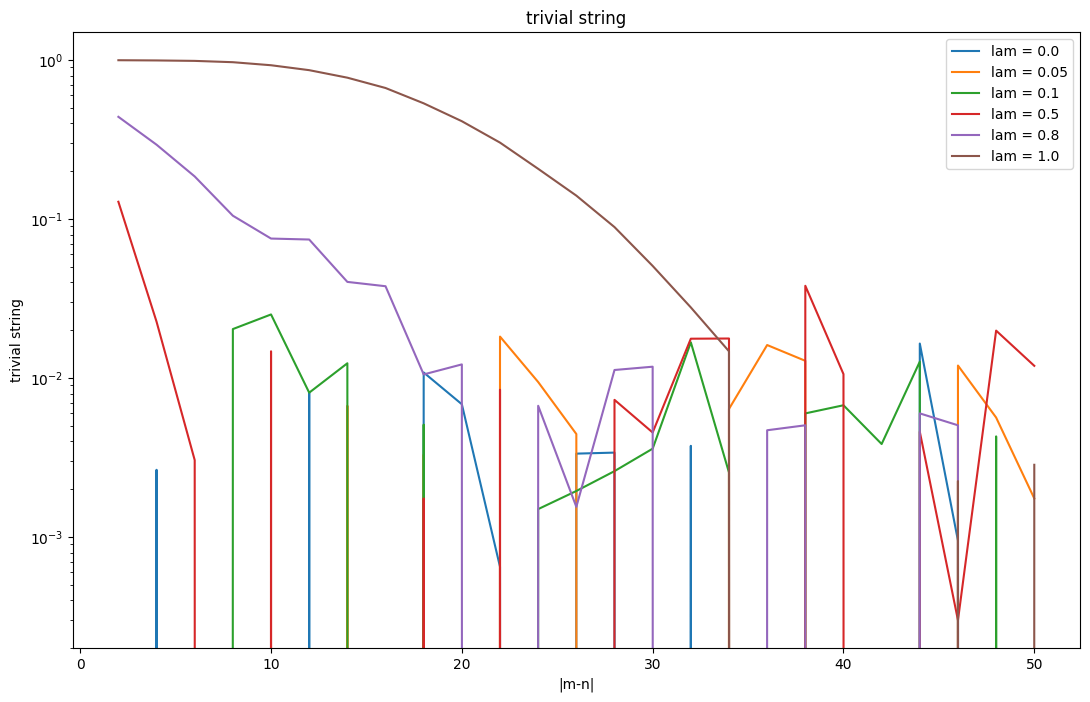

/Users/jtiosue/Documents/Repositories/OpenTO/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


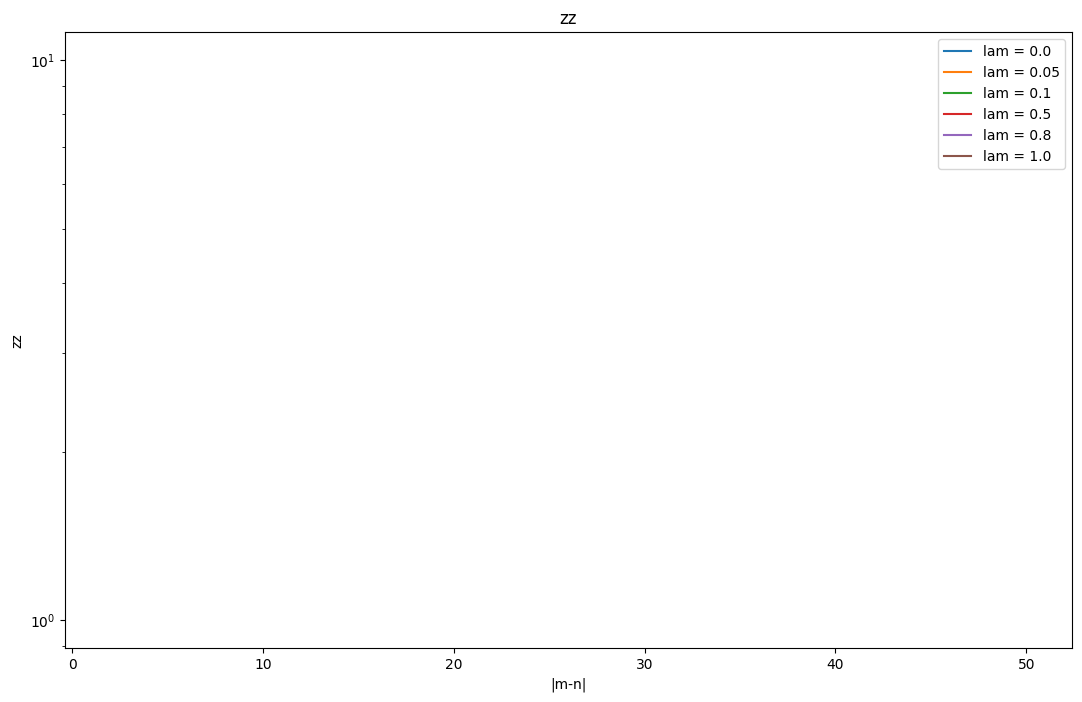

In [6]:
plot_lt("string")
plot_lt("trivial string")
plot_lt("zz")
plt.show()